Exploration: Random Forest Classifier on the Iris Dataset

Objective:
1. Use the Iris dataset from sklearn.datasets to predict flower species.
2. Measure prediction accuracy using a default number of trees (n_estimators=10).
3. Fine-tune the model by varying the number of trees and determine the best-performing configuration.
4. Explore how results depend on the random_state and cross-validation settings.

Key Questions:
- How does increasing the number of trees affect accuracy?
- Why do results vary depending on the random_state?

In [1]:
#---------------------------------------------
# Imports
#---------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:

#---------------------------------------------
# Load and Inspect Dataset
#---------------------------------------------
iris = load_iris()

# Convert to DataFrame for easy handling
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Examine structure
print(df.head(2))
print("Target classes:", iris.target_names)

# what are the target classes
df['target'].value_counts() # [0, 1, 2]=['setosa' 'versicolor' 'virginica']


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

   target  
0       0  
1       0  
Target classes: ['setosa' 'versicolor' 'virginica']


target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
#---------------------------------------------
# Define Features (X) and Target (y)
#---------------------------------------------
X = df.drop('target', axis=1)
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42 # increasing the test size as the dataset itself is small
)

In [13]:
#---------------------------------------------
# Model 1: Default Random Forest (n_estimators=10)
#---------------------------------------------
print("\n=== Model 1: Default Random Forest (10 Trees) ===")
model_1 = RandomForestClassifier(n_estimators=10, random_state=42)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# Evaluate classification performance
print(classification_report(y_test, y_pred_1))

# Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(cm_1)


=== Model 1: Default Random Forest (10 Trees) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [ ]:
# Why use Cross-Validation: 
# It provides a more robust measure of generalization compared to a single test split.
# It helps prevent overfitting, where the model performs well on the training data but 
# fails to generalize to new data.

# 5-Fold Cross-Validation
scores = cross_val_score(model_1, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9666666666666668



=== Fine-Tuning Number of Trees (Random Forest) ===
Best Cross-Validation Accuracy: 0.933
Optimal Number of Trees (n_estimators): 32


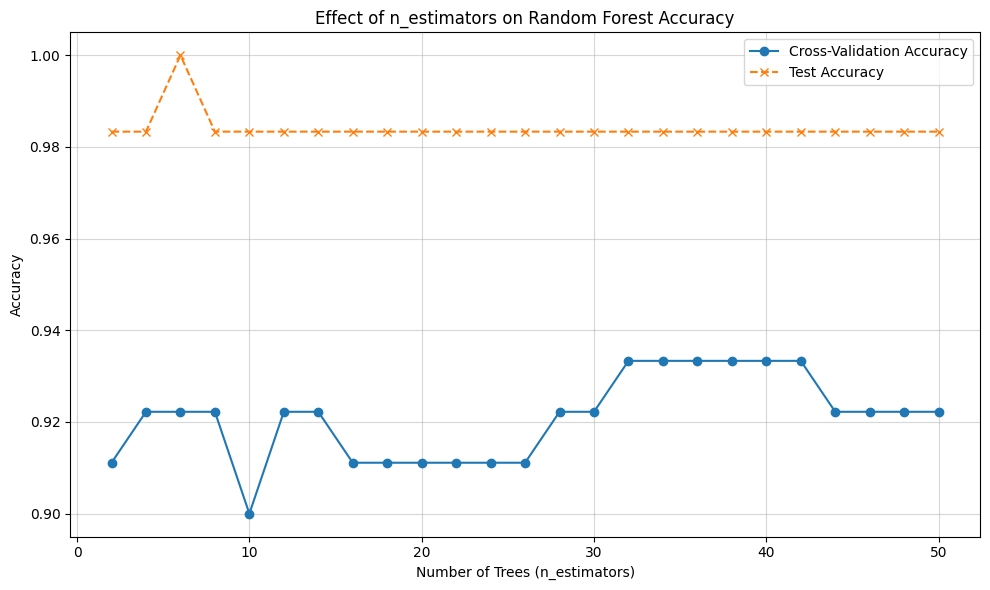

In [15]:
#---------------------------------------------
# Random Forest Model Tuning: Varying n_estimators
#---------------------------------------------
# Description:
# This script evaluates the effect of increasing the number of trees (n_estimators)
# on Random Forest performance. It computes both cross-validation accuracy (as a 
# measure of model generalization) and test accuracy (on a fixed holdout set). 
# This helps identify where additional trees yield diminishing returns, and 
# ensures model stability through consistent random seeding and splits.
#
# Steps:
# 1. Perform a fixed train/test split to ensure comparability.
# 2. Iterate over a range of tree counts (2–50, step 2).
# 3. For each model:
#       - Compute 5-fold cross-validation accuracy on training data.
#       - Compute accuracy on the fixed test set.
# 4. Identify and report the number of trees with the best cross-validation score.
# 5. Plot performance trends for visual interpretation.
#---------------------------------------------

print("\n=== Fine-Tuning Number of Trees (Random Forest) ===")

# Split data once for consistency across models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Range of tree counts to evaluate
n_estimators_range = range(2, 51, 2)
cv_means, test_scores = [], []

# Evaluate model performance for each number of trees
for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Cross-validation (5-fold) mean accuracy
    cv_mean = cross_val_score(model, X_train, y_train, cv=5).mean()
    cv_means.append(cv_mean)

    # Test accuracy on holdout set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_pred))

# Identify best-performing configuration
best_cv_score = max(cv_means)
best_n_estimators = n_estimators_range[cv_means.index(best_cv_score)]

print(f"Best Cross-Validation Accuracy: {best_cv_score:.3f}")
print(f"Optimal Number of Trees (n_estimators): {best_n_estimators}")

#---------------------------------------------
# Visualization
#---------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_means, marker='o', label='Cross-Validation Accuracy')
plt.plot(n_estimators_range, test_scores, marker='x', linestyle='--', label='Test Accuracy')
plt.title("Effect of n_estimators on Random Forest Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:

#---------------------------------------------
# Exploring Effect of Random State and CV Splits
#---------------------------------------------
print("\n=== Exploring Random State and Cross-Validation Settings ===")

rng_nums = [0]
cv_nums = [5, 10]
results = {}

for rng_num in rng_nums:
    for cv_num in cv_nums:
        cv_means, test_scores = [], []
        
        for n in n_estimators_range:
            rng = np.random.RandomState(rng_num)
            model = RandomForestClassifier(n_estimators=n, random_state=rng)
            
            # Compute accuracies
            cv_mean = cross_val_score(model, X, y, cv=cv_num).mean()
            model.fit(X_train, y_train)
            test_score = accuracy_score(y_test, model.predict(X_test))
            
            cv_means.append(cv_mean)
            test_scores.append(test_score)
        
        results[(rng_num, cv_num)] = {'cv_means': cv_means, 'test_scores': test_scores}

# Plot results for different settings
plt.figure(figsize=(12, 8))
for (rng_num, cv_num), metrics in results.items():
    label = f"RNG={rng_num}, CV={cv_num}"
    plt.plot(n_estimators_range, metrics['cv_means'], marker='o', label=f"{label} (CV Mean)")
    plt.plot(n_estimators_range, metrics['test_scores'], marker='x', linestyle='--', label=f"{label} (Test Score)")

plt.title("Accuracy vs Number of Trees (Varying RNG and CV Settings)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

#---------------------------------------------
# Comparing Models with Different n_estimators
#---------------------------------------------
print("\n=== Comparing Classification Reports ===")

# Model with fewer trees
model_1 = RandomForestClassifier(n_estimators=2, random_state=3)
model_1.fit(X_train, y_train)
print("Model 1 (2 Trees):")
print(classification_report(y_test, model_1.predict(X_test)))

# Model with more trees
model_2 = RandomForestClassifier(n_estimators=10, random_state=3)
model_2.fit(X_train, y_train)
print("\nModel 2 (10 Trees):")
print(classification_report(y_test, model_2.predict(X_test)))

#---------------------------------------------
# Checking for Overfitting (Cross-Validation)
#---------------------------------------------
print("\n=== Overfitting Check (Cross-Validation on Model 2) ===")
cv_scores = cross_val_score(model_2, X, y, cv=5)
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

#---------------------------------------------
# Increasing Estimators Further (Model 3)
#---------------------------------------------
print("\n=== Model 3: Increased Number of Trees (20) ===")
model_3 = RandomForestClassifier(n_estimators=20, random_state=3)
model_3.fit(X_train, y_train)

# Evaluate training vs testing accuracy
train_acc = accuracy_score(y_train, model_3.predict(X_train))
test_acc = accuracy_score(y_test, model_3.predict(X_test))

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

# Cross-validation for Model 3
cv_scores_3 = cross_val_score(model_3, X, y, cv=5)
print("CV Scores:", cv_scores_3)
print(f"Mean CV Score: {cv_scores_3.mean():.2f}")

"""
Summary Notes:
--------------
- Increasing n_estimators generally improves model stability and accuracy until performance plateaus.
- Random state affects results because it controls the randomness in tree sampling and bootstrapping.
- Cross-validation provides a more robust measure of generalization compared to a single test split.
"""
